In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
dataset= pd.read_csv('house_price.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset.shape

(1460, 81)

In [4]:
# Missing value
dataset.isna().sum().sum()

6965

In [5]:
feature_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

In [6]:
for feature in feature_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'in percent')

LotFrontage 0.1774 in percent
Alley 0.9377 in percent
MasVnrType 0.0055 in percent
MasVnrArea 0.0055 in percent
BsmtQual 0.0253 in percent
BsmtCond 0.0253 in percent
BsmtExposure 0.026 in percent
BsmtFinType1 0.0253 in percent
BsmtFinType2 0.026 in percent
FireplaceQu 0.4726 in percent
GarageType 0.0555 in percent
GarageYrBlt 0.0555 in percent
GarageFinish 0.0555 in percent
GarageQual 0.0555 in percent
GarageCond 0.0555 in percent
PoolQC 0.9952 in percent
Fence 0.8075 in percent
MiscFeature 0.963 in percent


# Visulaization

In [7]:
# Mising value- variable relationship check with out put variable

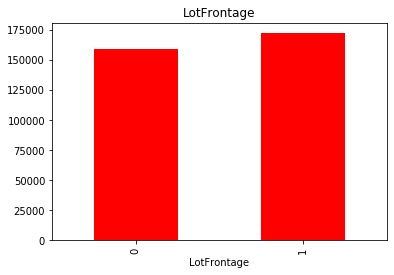

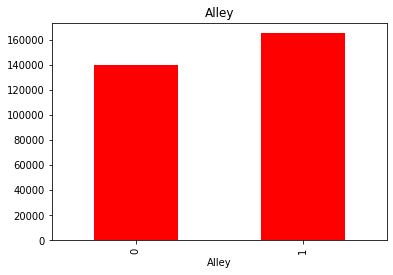

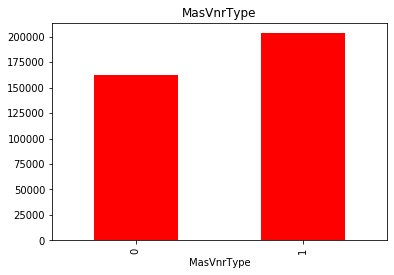

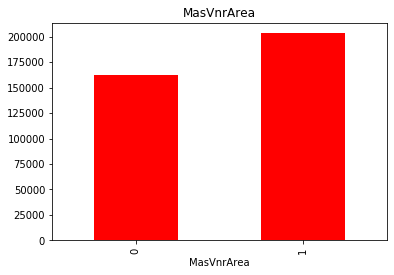

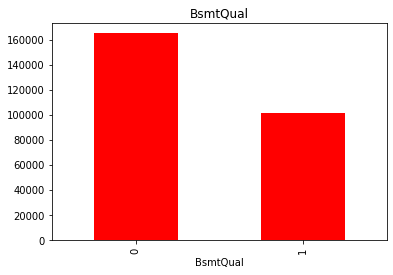

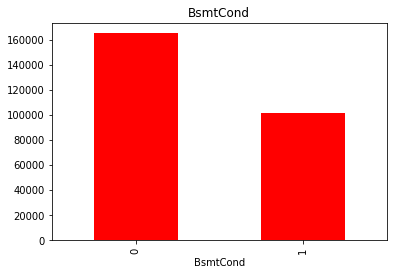

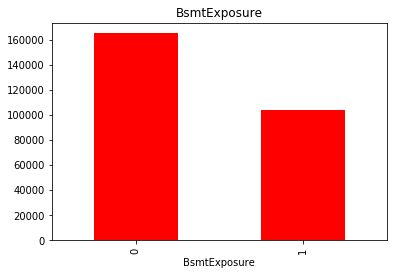

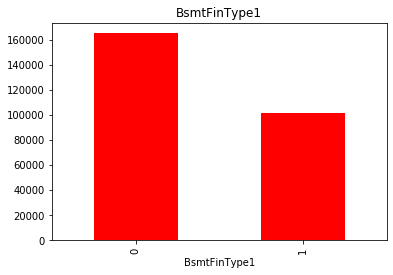

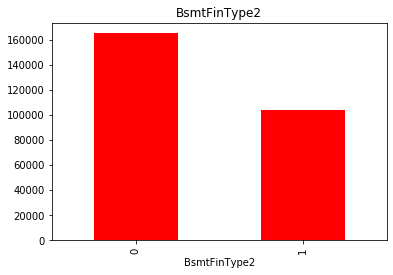

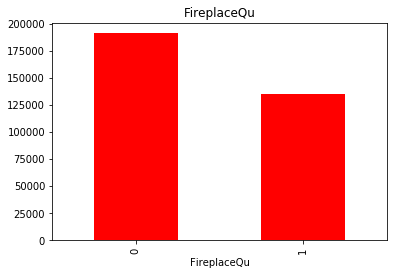

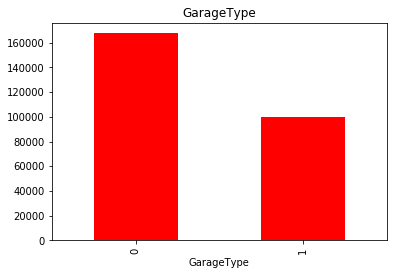

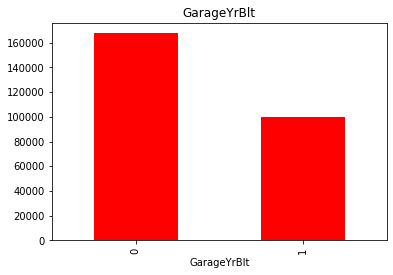

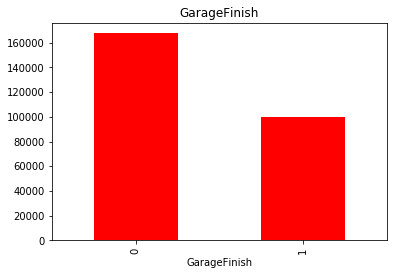

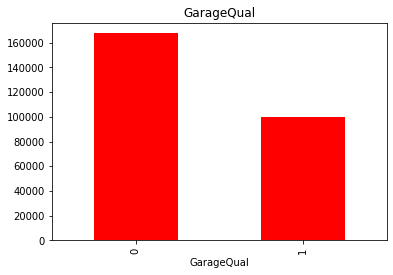

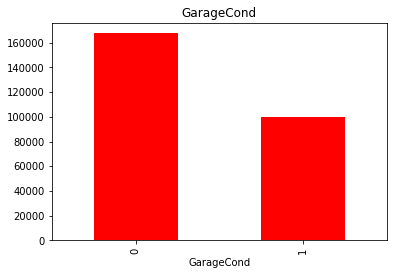

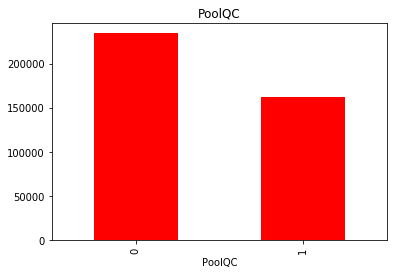

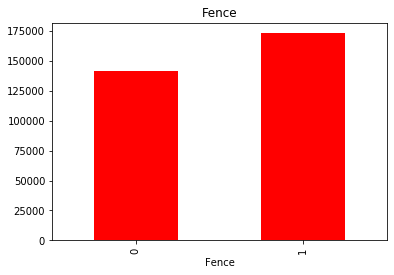

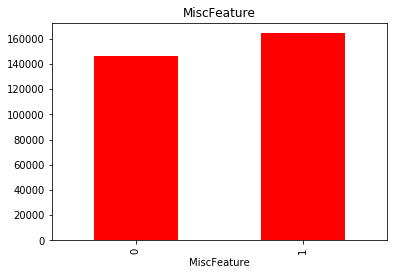

In [8]:
for feature in feature_with_na:
    data=dataset.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar(color='red')
    plt.title(feature)
    plt.show()

#### NUMERICAL VARIABLE

In [9]:
numerical_variable=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print("In total Numerical variable {}".format (len(numerical_variable)))

In total Numerical variable 38


In [10]:
dataset[numerical_variable].head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
# handling variable that represent the year data

year_feature=[feature for feature in numerical_variable if "Yr" in feature or "Year" in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
# Checking the year feature unique values

for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

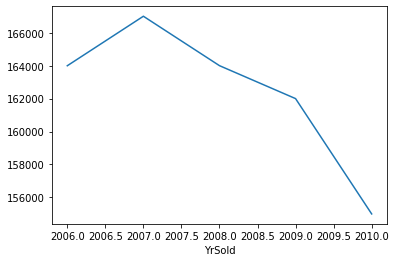

In [13]:
# Visualization of the variable- YrSold

dataset.groupby("YrSold")['SalePrice'].median().plot()

insights assist to know the sale price of the article decrease as the article life increase

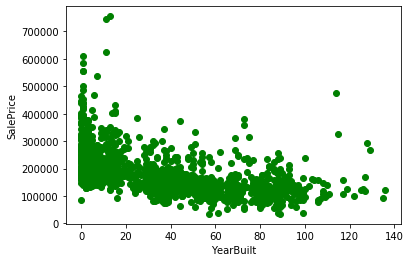

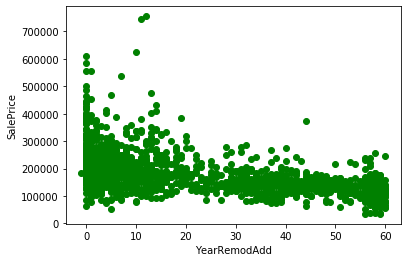

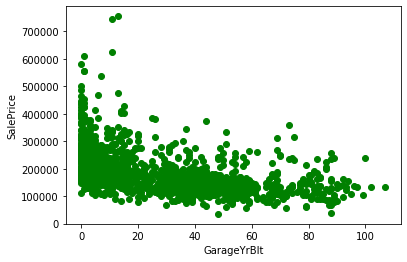

In [14]:
for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'], color='green')
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

#### DISCRETE VARIABLE

In [15]:
discrete_feature=[feature for feature in numerical_variable if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Varialbe Count: {}".format(len(discrete_feature)))

Discrete Varialbe Count: 17


In [16]:
dataset[discrete_feature].head(3)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9


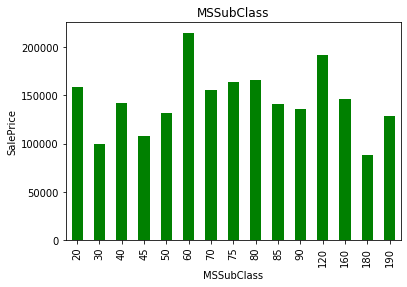

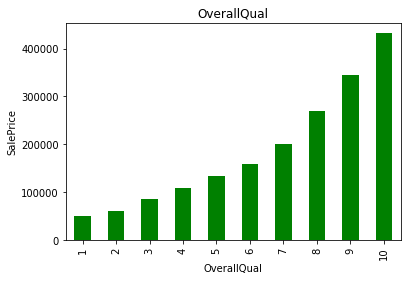

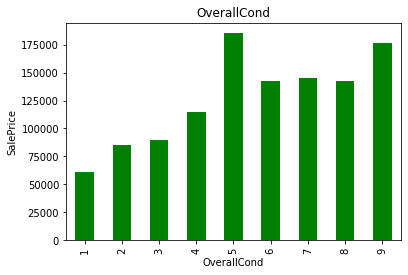

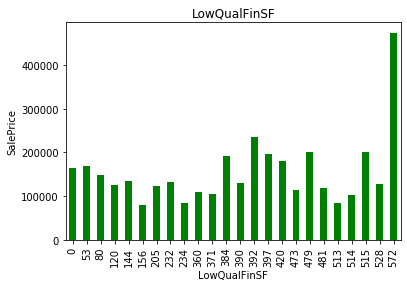

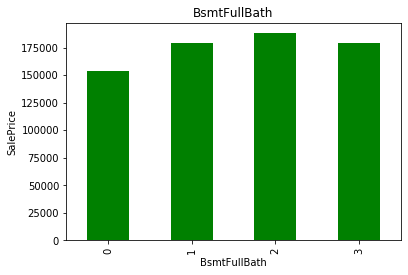

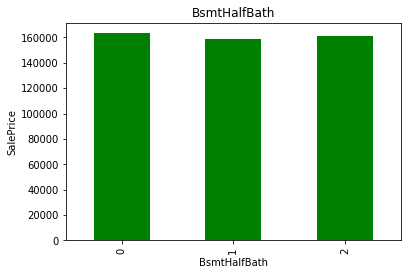

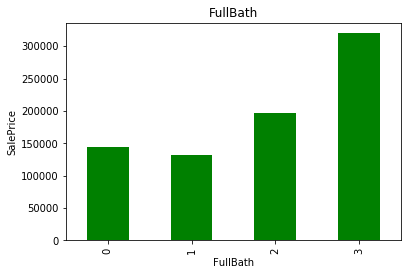

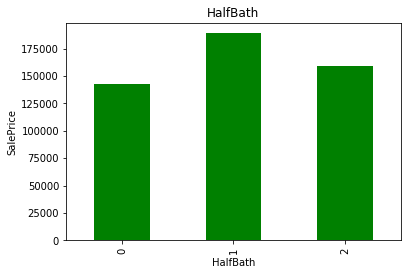

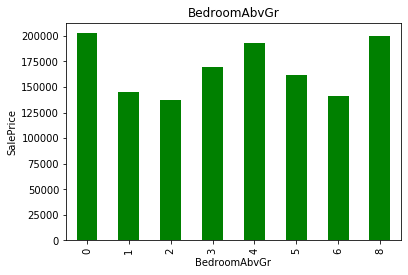

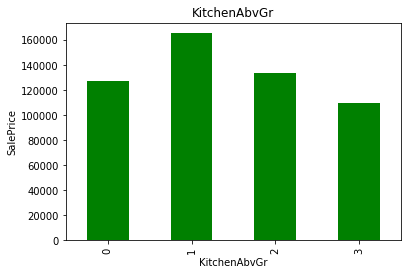

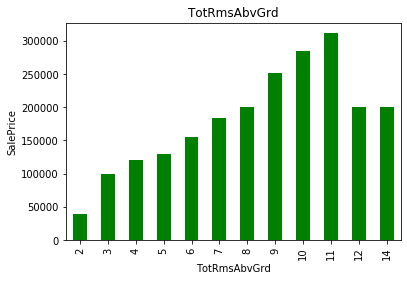

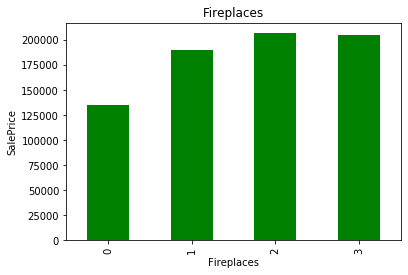

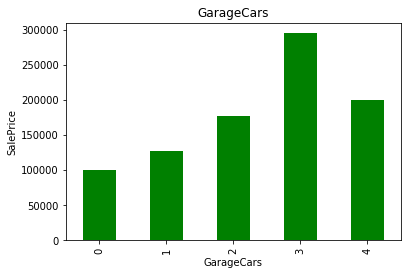

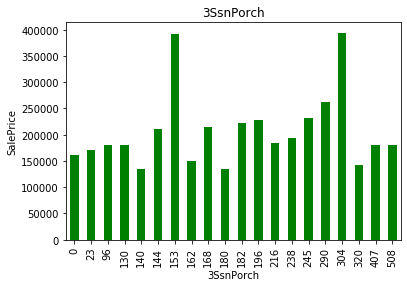

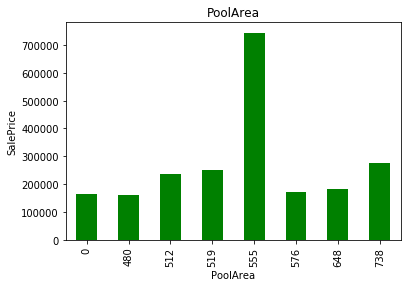

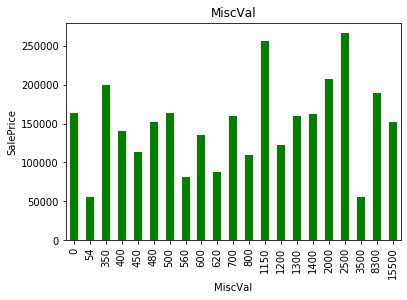

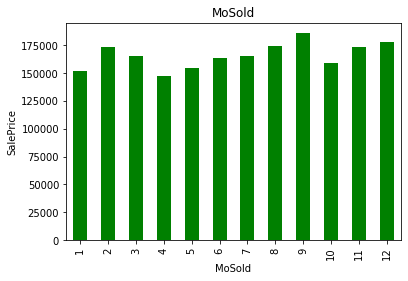

In [17]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color='green')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Continous Variable

In [18]:
continuous_feature=[feature for feature in numerical_variable if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


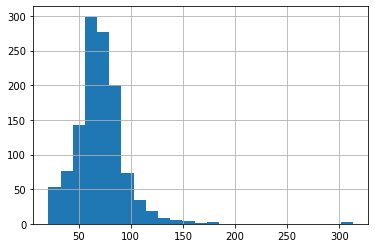

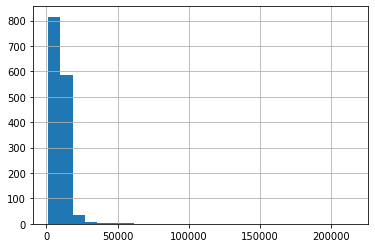

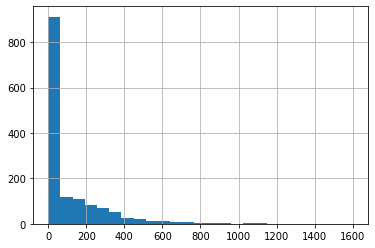

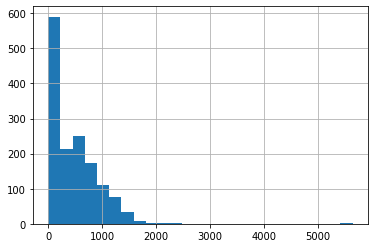

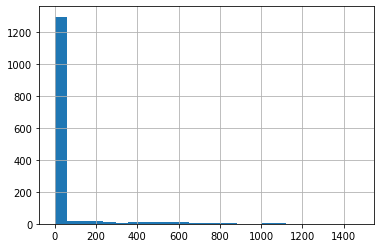

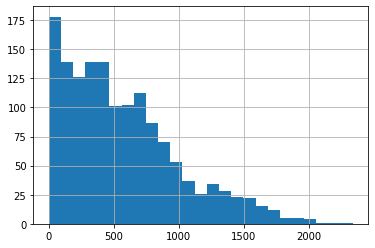

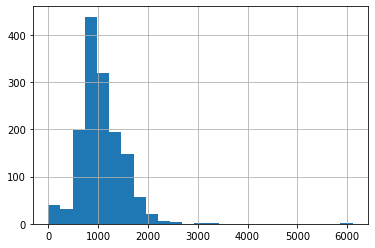

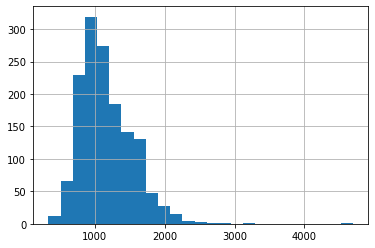

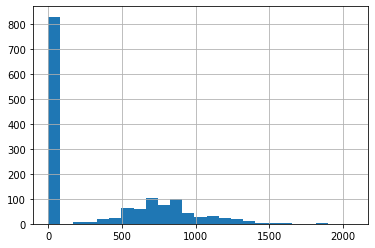

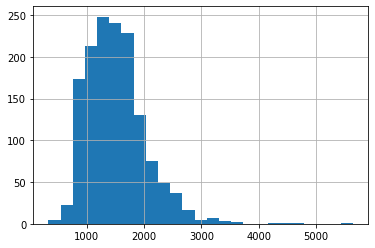

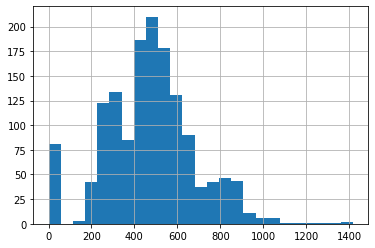

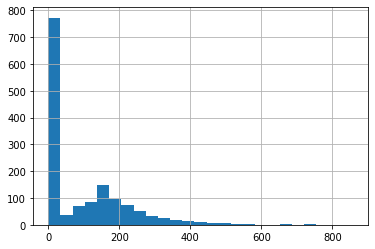

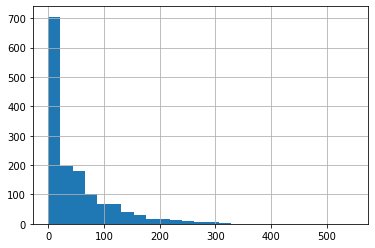

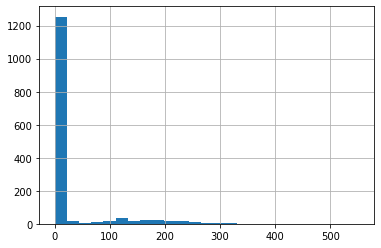

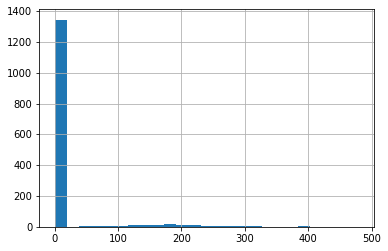

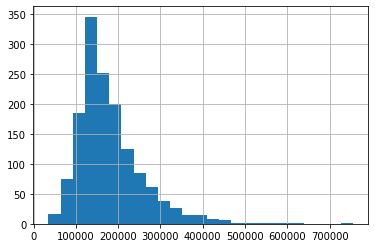

In [19]:
for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.show()

In [20]:
## Visualization using logarithmic transformation

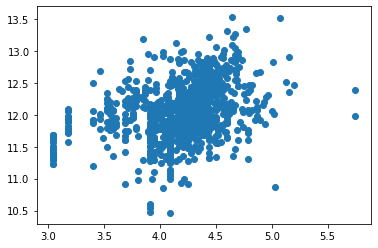

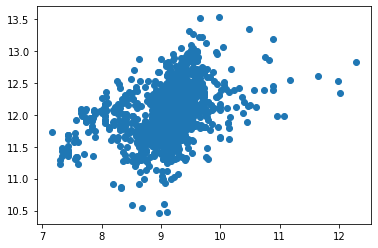

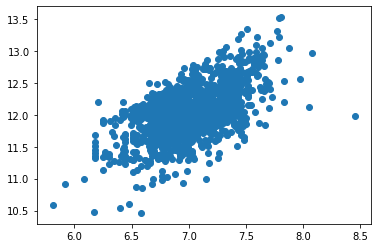

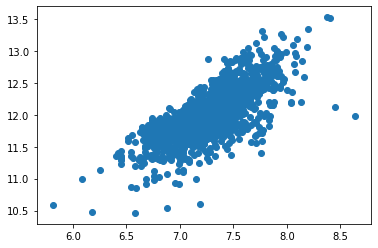

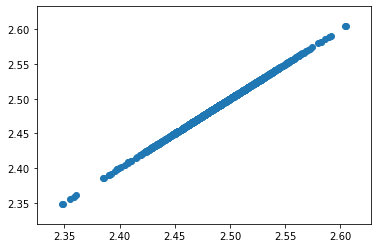

In [21]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.show()
        

#### Outlier visualization-Continuous_feature

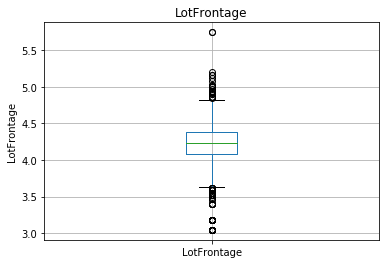

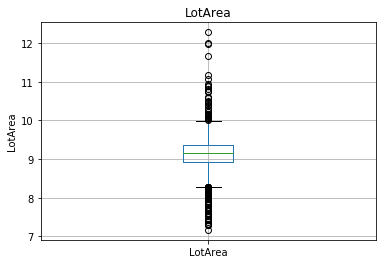

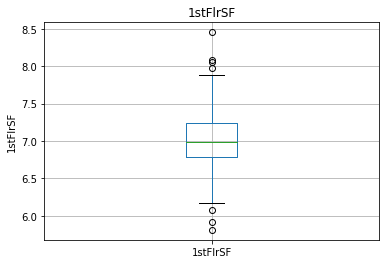

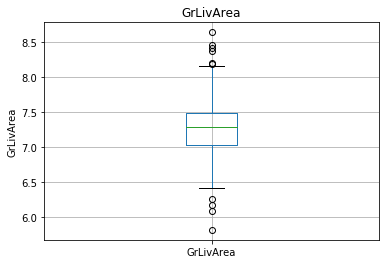

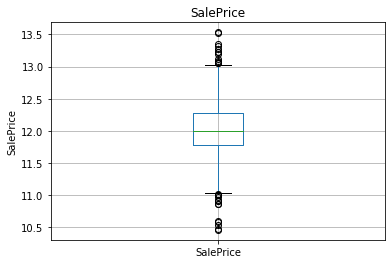

In [22]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Categorical Variables

In [23]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']

In [24]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [25]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

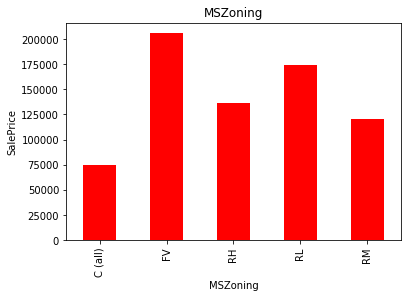

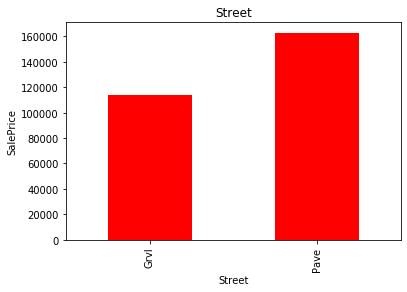

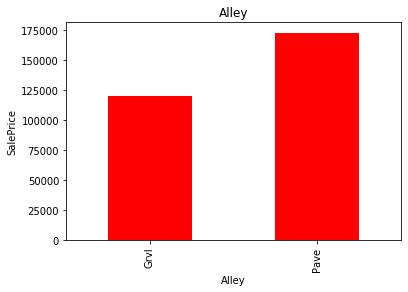

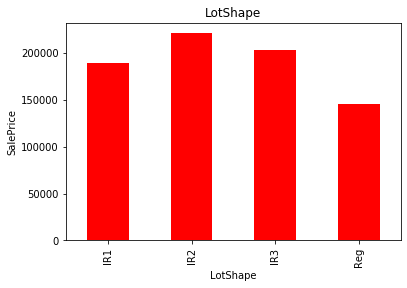

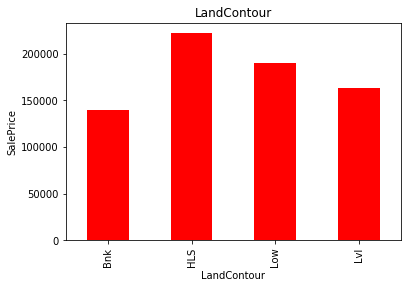

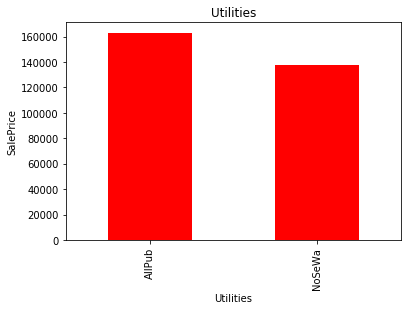

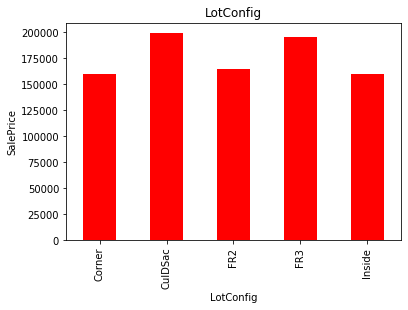

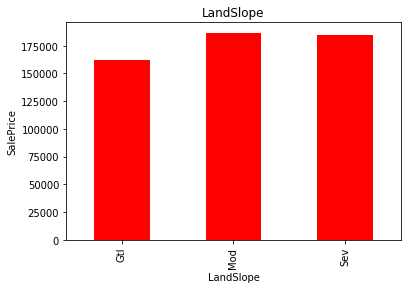

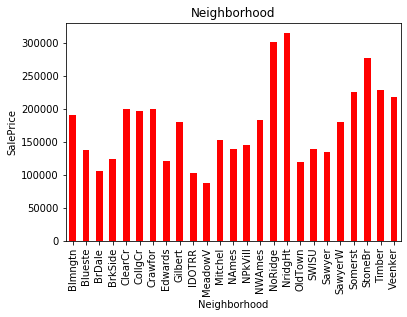

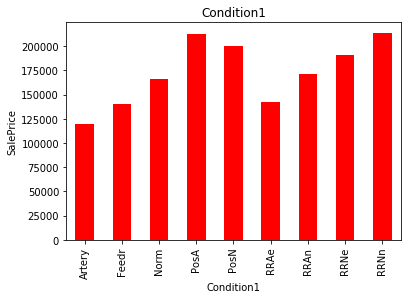

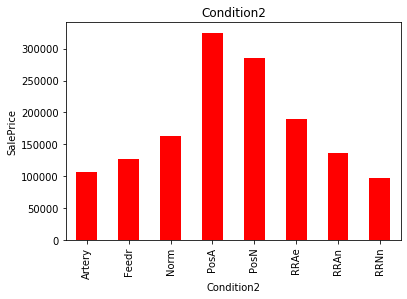

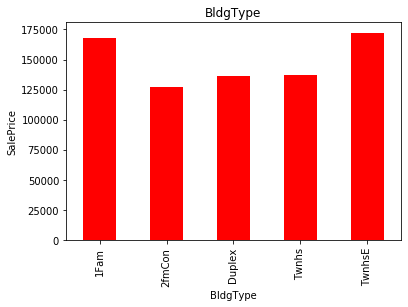

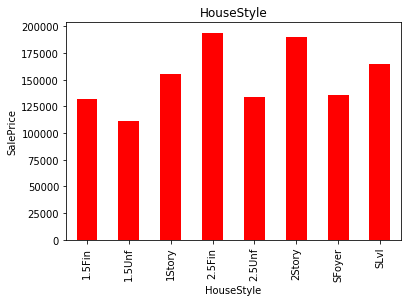

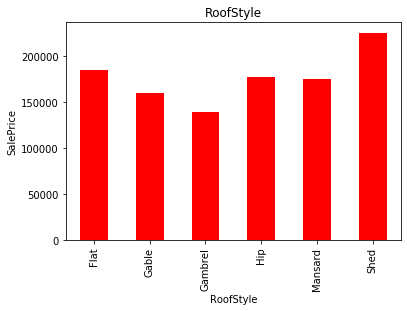

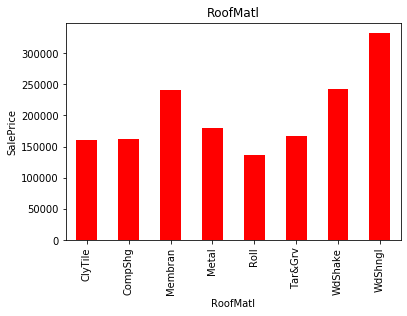

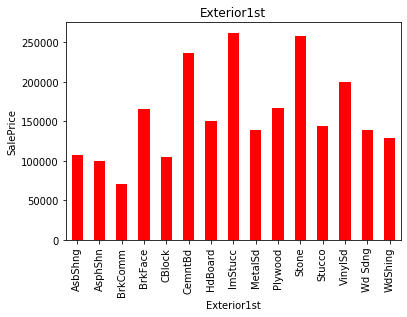

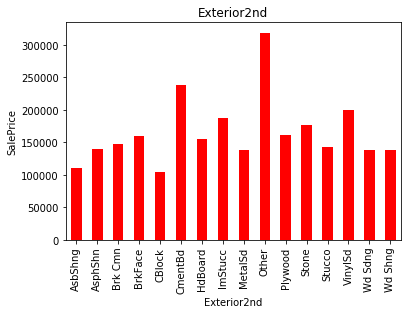

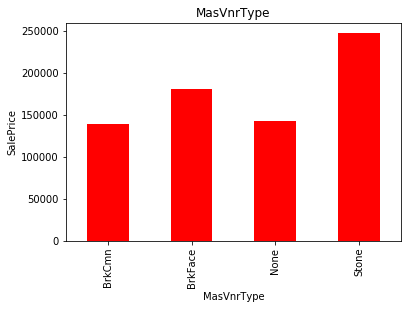

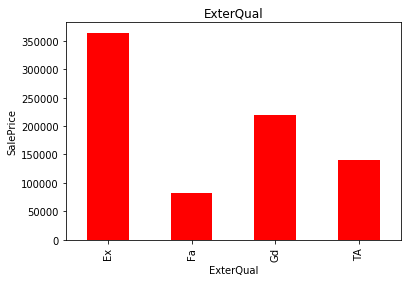

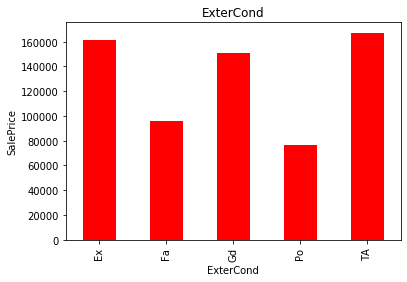

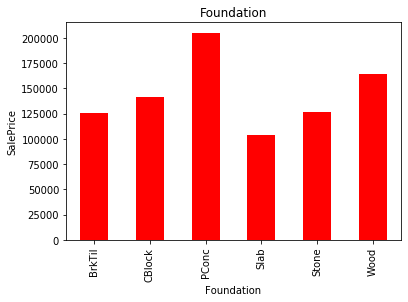

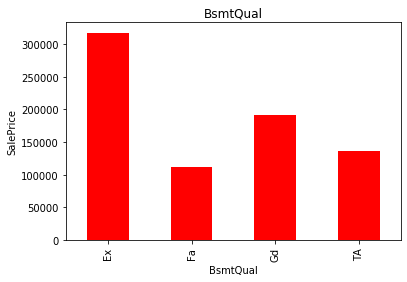

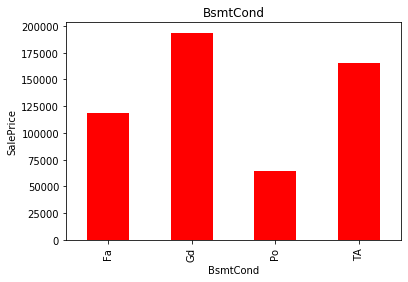

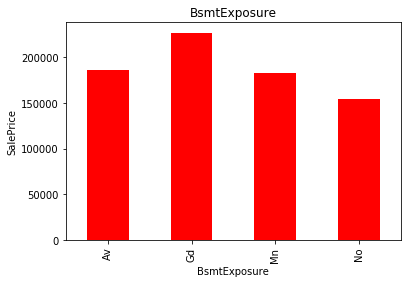

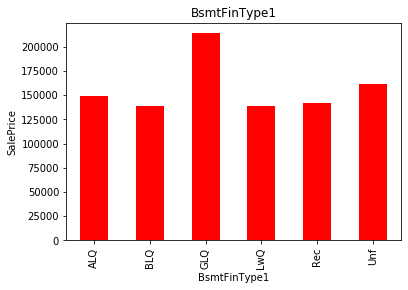

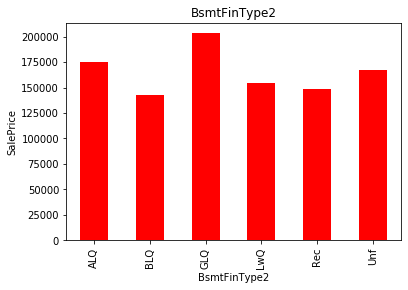

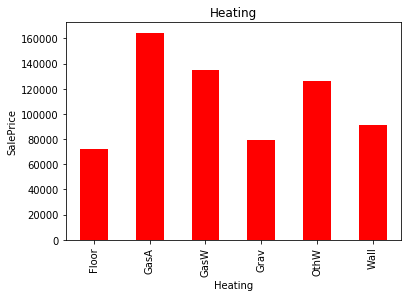

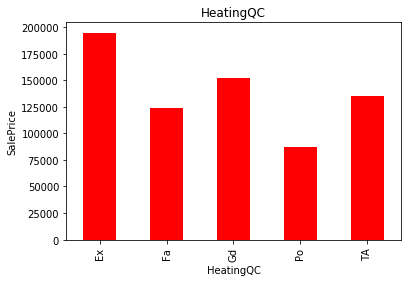

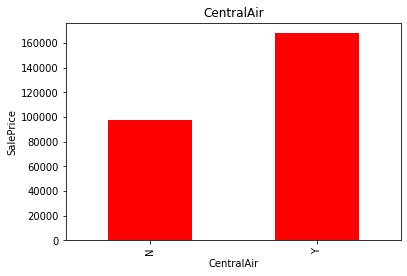

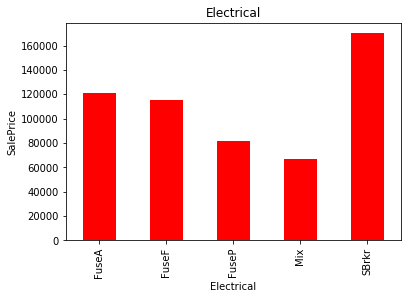

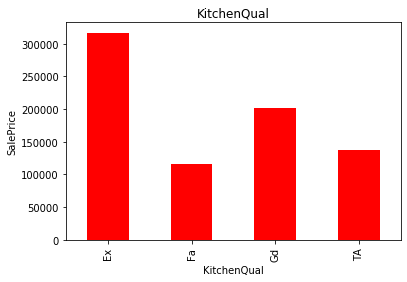

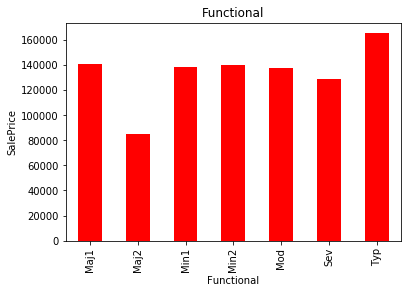

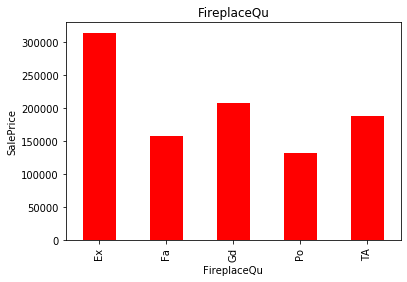

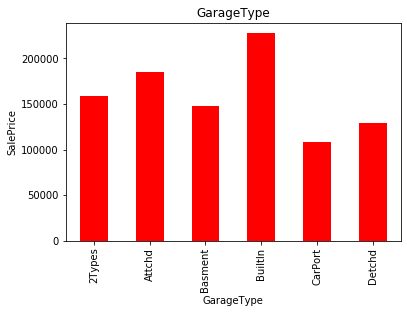

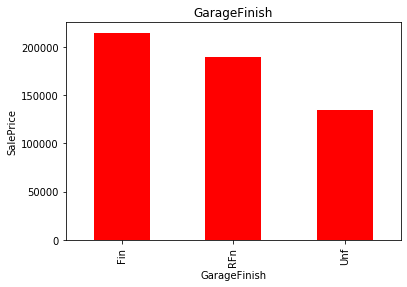

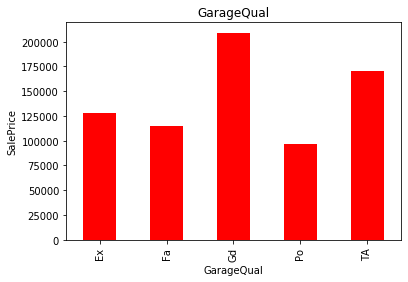

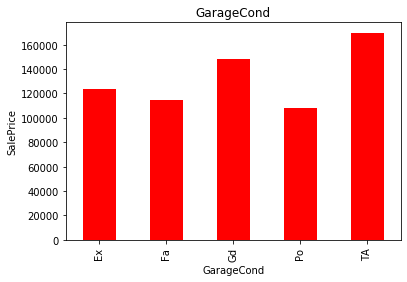

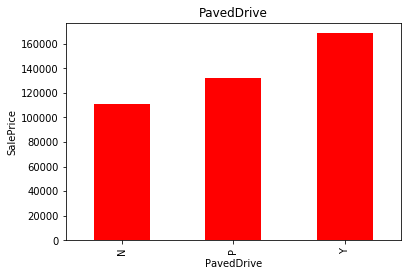

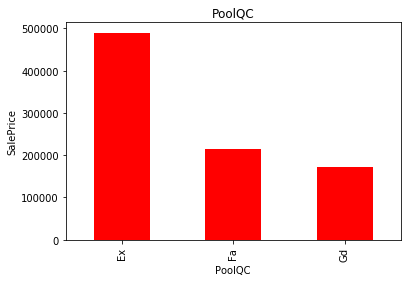

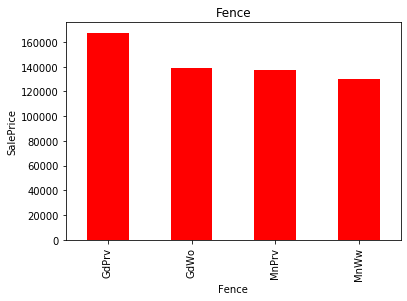

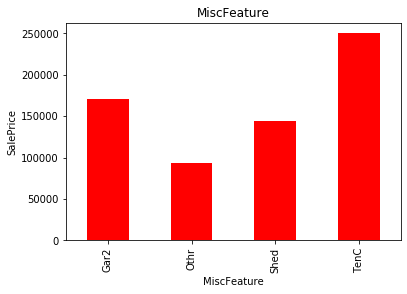

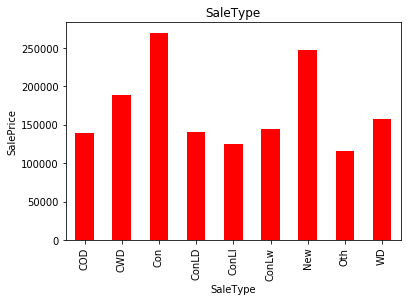

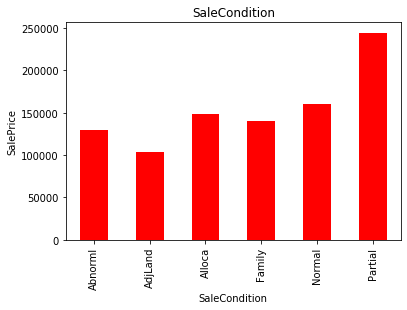

In [26]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color='red')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### HANDLING MISSING VALUE

In [27]:
## Let us collect all the nan values

In [28]:
## Going for Categorical feature first
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [29]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum().sum()

0

In [30]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [31]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum().sum()
    

0

In [32]:
## Date Time Variables

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [33]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


#### NUMERICAL FEATURE

In [34]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [35]:
dataset[['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.140453,7.140453,12.109011
2,4.219508,9.328123,6.824374,7.487734,12.317167
3,4.094345,9.164296,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.043160,7.695303,12.429216


#### Handling Rare Categorical Feature

In [36]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [37]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,Missing,IR2,Lvl,AllPub,...,Shed,480,4,2009,WD,Normal,12.128111,1,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,8,2006,WD,Normal,12.273731,0,0,0
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,...,Missing,0,5,2007,WD,Normal,11.458997,0,0,0
98,99,30,RL,4.442651,9.270965,Pave,Missing,Reg,Lvl,AllPub,...,Shed,400,5,2010,COD,Abnorml,11.326596,0,0,0


In [38]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [39]:
dataset[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,14,2,...,4,2,2,3,2,0,4,2,2,3
1,3,1,2,0,1,1,2,0,11,1,...,4,2,2,3,2,0,4,2,2,3
2,3,1,2,1,1,1,0,0,14,2,...,4,2,2,3,2,0,4,2,2,3
3,3,1,2,1,1,1,1,0,16,2,...,2,1,2,3,2,0,4,2,2,0
4,3,1,2,1,1,1,2,0,22,2,...,4,2,2,3,2,0,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,2,0,1,1,0,0,13,2,...,4,2,2,3,2,0,4,2,2,3
1456,3,1,2,0,1,1,0,0,12,2,...,4,1,2,3,2,0,2,2,2,3
1457,3,1,2,0,1,1,0,0,16,2,...,4,2,2,3,2,0,3,1,2,3
1458,3,1,2,0,1,1,0,0,8,2,...,4,1,2,3,2,0,4,2,2,3


In [40]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
len(feature_scale)

82

In [41]:
dataset[feature_scale]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,...,4,2,0,2,2008,2,3,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,...,4,2,0,5,2007,2,3,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,...,4,2,0,9,2008,2,3,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,...,4,2,0,2,2006,2,0,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,...,4,2,0,12,2008,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,1,2,0,1,1,0,...,4,2,0,8,2007,2,3,0,0,0
1456,20,3,4.442651,9.486076,1,2,0,1,1,0,...,2,2,0,2,2010,2,3,0,0,0
1457,70,3,4.189655,9.109636,1,2,0,1,1,0,...,3,1,2500,5,2010,2,3,0,0,0
1458,20,3,4.219508,9.181632,1,2,0,1,1,0,...,4,2,0,4,2010,2,3,0,0,0


In [42]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset[feature_scale])

scaled_data = scaler.transform(dataset[feature_scale])

scaled_data

array([[ 0.07337496,  0.35904396, -0.07586857, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.57242366, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [ 0.07337496,  0.35904396,  0.06500658, ..., -0.46438521,
        -0.07422696, -0.24235968],
       ...,
       [ 0.30985939,  0.35904396, -0.02820043, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.06500658, ..., -0.46438521,
        -0.07422696, -0.24235968],
       [-0.87256276,  0.35904396,  0.3709213 , ..., -0.46438521,
        -0.07422696, -0.24235968]])

In [43]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [44]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.073375,0.359044,-0.075869,-0.133231,0.064238,0.244717,-0.657040,-0.111168,...,0.437409,0.189185,-0.087688,-1.599111,0.138777,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
1,2,12.109011,-0.872563,0.359044,0.572424,0.113442,0.064238,0.244717,-0.657040,-0.111168,...,0.437409,0.189185,-0.087688,-0.489110,-0.614439,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
2,3,12.317167,0.073375,0.359044,0.065007,0.420061,0.064238,0.244717,0.872909,-0.111168,...,0.437409,0.189185,-0.087688,0.990891,0.138777,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
3,4,11.849398,0.309859,0.359044,-0.325778,0.103347,0.064238,0.244717,0.872909,-0.111168,...,0.437409,0.189185,-0.087688,-1.599111,-1.367655,-0.011669,-3.302211,-0.464385,-0.074227,-0.24236
4,5,12.429216,0.073375,0.359044,0.724756,0.878409,0.064238,0.244717,0.872909,-0.111168,...,0.437409,0.189185,-0.087688,2.100892,0.138777,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.073375,0.359044,-0.223402,-0.259188,0.064238,0.244717,-0.657040,-0.111168,...,0.437409,0.189185,-0.087688,0.620891,-0.614439,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
1456,1457,12.254863,-0.872563,0.359044,0.761706,0.725419,0.064238,0.244717,-0.657040,-0.111168,...,-1.616021,0.189185,-0.087688,-1.599111,1.645210,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
1457,1458,12.493130,0.309859,0.359044,-0.028200,-0.002325,0.064238,0.244717,-0.657040,-0.111168,...,-0.589306,-4.492346,4.953112,-0.489110,1.645210,-0.011669,0.183014,-0.464385,-0.074227,-0.24236
1458,1459,11.864462,-0.872563,0.359044,0.065007,0.136861,0.064238,0.244717,-0.657040,-0.111168,...,0.437409,0.189185,-0.087688,-0.859110,1.645210,-0.011669,0.183014,-0.464385,-0.074227,-0.24236


In [45]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
scaled_data=scaler.transform(dataset[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [47]:
data.head(2)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.0,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.0,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0


In [48]:
data.to_csv('X_train1.csv',index=False)

In [49]:
data.head(2)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.0,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.0,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0


In [50]:
data.shape

(1460, 84)

In [51]:
X_train_new=data.drop(['Id','SalePrice'], axis=1)

In [52]:
X_train_new.shape

(1460, 82)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=82)
pca.fit(X_train_new)

PCA(copy=True, iterated_power='auto', n_components=82, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
var= np.round(pca.explained_variance_ratio_,3)
print(var)

[0.225 0.069 0.054 0.047 0.046 0.037 0.034 0.029 0.025 0.024 0.021 0.021
 0.02  0.018 0.018 0.016 0.015 0.015 0.012 0.012 0.012 0.011 0.011 0.01
 0.01  0.009 0.009 0.009 0.009 0.008 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.003
 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.   ]


In [55]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[22.55 29.42 34.78 39.44 44.01 47.73 51.16 54.05 56.58 58.96 61.1  63.22
 65.23 67.07 68.83 70.44 71.92 73.38 74.6  75.81 76.98 78.1  79.2  80.24
 81.21 82.16 83.07 83.95 84.82 85.6  86.33 87.05 87.76 88.38 88.97 89.52
 90.06 90.58 91.05 91.52 91.96 92.39 92.8  93.2  93.58 93.95 94.31 94.66
 95.   95.32 95.62 95.92 96.21 96.49 96.75 97.   97.24 97.48 97.71 97.91
 98.11 98.3  98.47 98.64 98.79 98.94 99.08 99.21 99.32 99.42 99.52 99.61
 99.69 99.77 99.84 99.9  99.94 99.96 99.98 99.99 99.99 99.99]


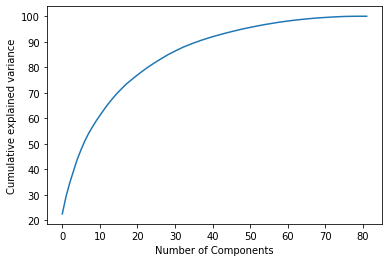

In [56]:
# Scree Plot
plt.plot(var1)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")
plt.show()

# opting for the components-50 as it contain the 95 percentage of the information

In [57]:
pca = PCA(n_components=50)
pca.fit(X_train_new)
var= np.round(pca.explained_variance_ratio_,3)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[22.55 29.42 34.78 39.44 44.01 47.73 51.16 54.05 56.58 58.96 61.1  63.22
 65.23 67.07 68.83 70.44 71.92 73.38 74.6  75.81 76.98 78.1  79.2  80.24
 81.21 82.16 83.07 83.95 84.82 85.6  86.33 87.05 87.76 88.38 88.97 89.52
 90.06 90.58 91.05 91.52 91.96 92.39 92.8  93.2  93.58 93.95 94.31 94.65
 94.99 95.3 ]


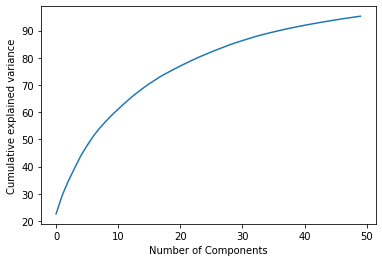

In [58]:
# Scree Plot
plt.plot(var1)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [59]:
loadings=pca.components_[0]
loadings

array([ 1.30543173e-03, -9.69292175e-02, -2.96663363e-02, -2.29158559e-02,
       -4.05157492e-03, -5.23463400e-02, -7.18815584e-02, -2.80559959e-02,
       -1.36349391e-04, -4.07996087e-02,  6.05536985e-03, -2.45189775e-01,
       -2.91918642e-02, -5.65848409e-03, -4.67631175e-02, -1.26731571e-01,
       -1.40176462e-01,  3.36343818e-02,  2.19374980e-01,  2.90259098e-01,
       -5.71420754e-02, -2.46926456e-03, -2.44060869e-01, -2.73113239e-01,
       -1.29233372e-01, -5.08072123e-02, -1.68976770e-01, -4.94992997e-02,
       -2.62108120e-01, -1.74237404e-01, -3.98137260e-02, -1.11185883e-01,
       -1.88477896e-01, -2.59793929e-02, -5.41044778e-02,  9.24593185e-03,
       -5.86400640e-02, -4.41869688e-02, -2.93881918e-02, -1.67028330e-01,
       -1.20573926e-01, -5.55936828e-02, -5.98734871e-02, -5.44023728e-02,
        1.21488820e-02, -7.20409713e-02, -3.71257486e-02,  3.57794573e-03,
       -1.26640771e-01, -9.32578656e-02, -4.68802801e-03,  1.82412835e-02,
       -1.84862860e-01, -

In [60]:
new_data=list(zip(X_train_new.columns,loadings))

In [61]:
new_data

[('MSSubClass', 0.0013054317344941557),
 ('MSZoning', -0.09692921749156168),
 ('LotFrontage', -0.029666336270882603),
 ('LotArea', -0.02291585589405725),
 ('Street', -0.004051574920357365),
 ('Alley', -0.052346339951175956),
 ('LotShape', -0.07188155841890298),
 ('LandContour', -0.02805599589854604),
 ('Utilities', -0.00013634939112221376),
 ('LotConfig', -0.0407996087166059),
 ('LandSlope', 0.006055369853572261),
 ('Neighborhood', -0.24518977503774936),
 ('Condition1', -0.029191864191588826),
 ('Condition2', -0.005658484091924768),
 ('BldgType', -0.04676311745392439),
 ('HouseStyle', -0.1267315710172757),
 ('OverallQual', -0.14017646164564032),
 ('OverallCond', 0.03363438183041865),
 ('YearBuilt', 0.2193749795165305),
 ('YearRemodAdd', 0.29025909834438607),
 ('RoofStyle', -0.057142075354652246),
 ('RoofMatl', -0.0024692645641412473),
 ('Exterior1st', -0.244060868988401),
 ('Exterior2nd', -0.27311323894169415),
 ('MasVnrType', -0.1292333722718597),
 ('MasVnrArea', -0.050807212294741444